<a href="https://colab.research.google.com/github/nikhilbansal23/NetflixDataAnalysis/blob/main/NetflixDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
# pip install mitosheet

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import mitosheet

In [102]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [103]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Netflix Data Analysis/netflix_data.csv')

In [104]:
# df.head(10)

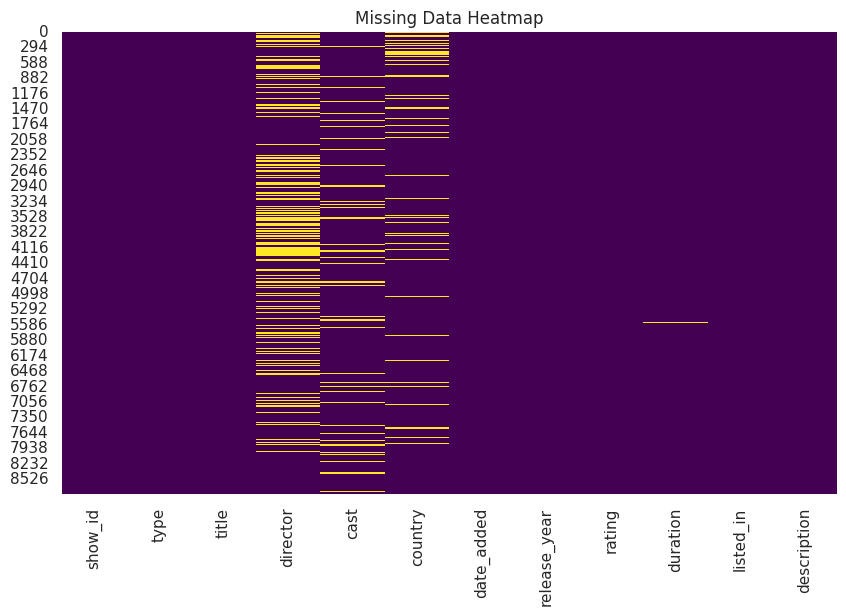

In [105]:
# Check for missing data using heatmap. Looks like we are good to go with missing data handling
missing_data = df.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


In [106]:
# Replace NaN with "Not Known" in multiple columns
columns_to_replace = ['director', 'cast', 'country','duration']
df[columns_to_replace] = df[columns_to_replace].fillna('Not Known')


In [107]:
len(df)

8807

In [108]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Content Diversity Analysis

In [109]:

content_diversity = {}

# Calculate count of unique values for each attribute
content_diversity['Type'] = df['type'].nunique()
content_diversity['Country'] = df['country'].nunique()
content_diversity['Release_Year'] = df['release_year'].nunique()
content_diversity['Genre'] = df['listed_in'].nunique()

# Print content diversity metrics
for attribute, count in content_diversity.items():
    print(f"Unique {attribute}: {count}")

Unique Type: 2
Unique Country: 749
Unique Release_Year: 74
Unique Genre: 514


## Content Growth Rate

    year_added  count
0       2008.0      2
1       2009.0      2
2       2010.0      1
3       2011.0     13
4       2012.0      3
5       2013.0     11
6       2014.0     24
7       2015.0     82
8       2016.0    429
9       2017.0   1188
10      2018.0   1649
11      2019.0   2016
12      2020.0   1879
13      2021.0   1498


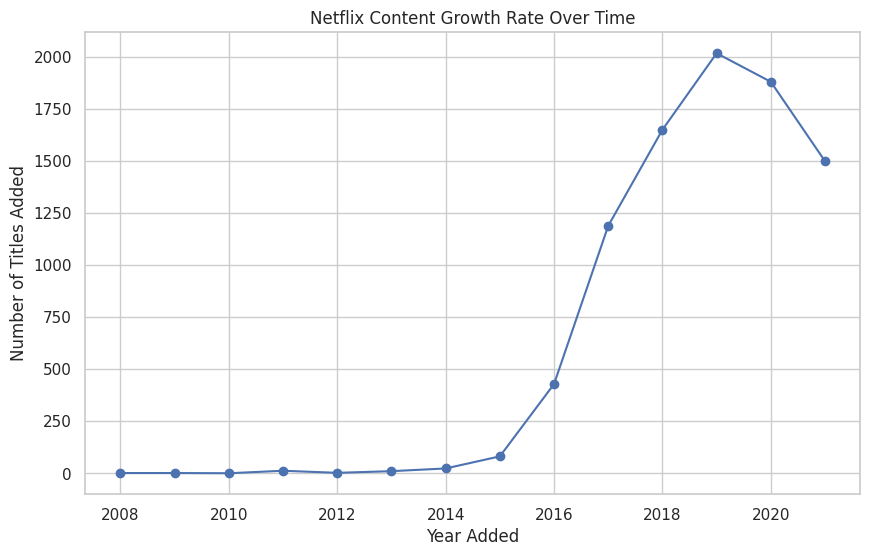

In [110]:
# Convert 'date_added' column to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

df['year_added'] = df['date_added'].dt.year

content_growth_rate = df.groupby('year_added').size().reset_index(name = 'count')

print(content_growth_rate)

plt.figure(figsize=(10, 6))
plt.plot(content_growth_rate['year_added'], content_growth_rate['count'], marker='o')
plt.title('Netflix Content Growth Rate Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()


##  Distribution of Ratings by Type



*   PG-13: This rating is a classification advising parents or guardians that material may be inappropriate for children under 13. The content may contain some material that parents might not want their children to view.

*   TV-MA: This rating is used for mature audiences. The content may be unsuitable for children under 17 and can include intense violence, strong language, sexual content, and other themes that are not suitable for minors.

*   PG: This rating is a classification indicating that some material may not be suitable for children. Parents are urged to be cautious, and some material may be inappropriate for pre-teenagers.

*   TV-14: This rating indicates that the content is suitable for viewers aged 14 and older. The content may contain violence, suggestive themes, crude humor, or other elements that may not be appropriate for children under 14 years of age.

*  TV-PG: This rating indicates that the program contains material that parents may find unsuitable for younger children. Parental guidance is advised.

*   TV-Y: This rating is suitable for all children. The content is specifically designed for a very young audience and does not contain any material that parents would find unsuitable for children.

*   TV-Y7: This rating is suitable for children aged 7 and above. The content may contain mild fantasy violence, comic mischief, or crude humor.

*   R: This rating is a classification indicating that the material may be inappropriate for children under 17. The content may contain strong language, violence, nudity, drug abuse, or other adult themes.



*   TV-G: This rating is suitable for all ages. The content is specifically designed to be appropriate for general audiences, including children.

*   G: This rating is suitable for general audiences. The content is free of any material that parents would find unsuitable for children.



*   NC-17: This rating is a classification indicating that the film is not suitable for viewers under 17 years of age. It may contain explicit content, including graphic violence, explicit sexual content, and strong language.

*   74 min, 84 min, 66 min: These are not ratings but likely refer to the duration (runtime) of movies or TV shows, measured in minutes.

* NR: This abbreviation typically stands for "Not Rated." It means that the film or program has not been assigned a rating by the appropriate rating organization.

* TV-Y7-FV: This rating is suitable for children aged 7 and above with fantasy violence.

* UR: This abbreviation typically stands for "Unrated." It means that the film or program has not been assigned a rating by the appropriate rating organization.














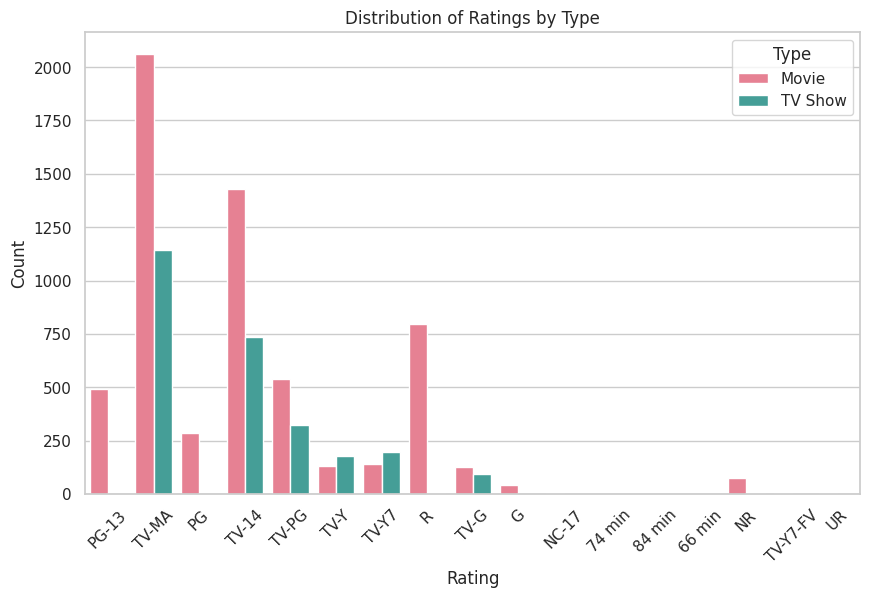

In [111]:
# Set seaborn style
sns.set(style="whitegrid")

# Plot the distribution of ratings within each type
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', hue='type', data=df, palette='husl')
plt.title('Distribution of Ratings by Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

In [112]:
df['year_added'] = df['year_added'].fillna(9999)
df['year_added'] = df['year_added'].astype(int)

In [113]:
df['year_added'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2009, 2008, 9999, 2010])

In [114]:
# Convert 'date_added' column to datetime

adult_content = df[df['listed_in'] == 'TV-MA']
content_growth_rate = adult_content.groupby('year_added').size().reset_index(name = 'count')

content_growth_rate

# plt.figure(figsize=(10, 6))
# plt.plot(content_growth_rate['year_added'], content_growth_rate['count'], marker='o')
# plt.title('Netflix Content Growth Rate Over Time')
# plt.xlabel('Year Added')
# plt.ylabel('Number of Titles Added')
# plt.grid(True)
# plt.show()


,year_added,count


In [115]:
# df.head(10)